# Corso di Probabilità e Statistica- il metodo di massima verosimiglianza - parte 2

In questo capitolo analizzeremo i dati tramite il metodo 
di massima verosimiglianza.

Consideriamo una distribuzione teorica $p(x|\lambda)$ dipendendente da uno o più parameteri $\lambda$ e un
set di dati sperimentali $(x_1, ... x_N)$. Il metodo
consente di stimare il miglior parametro $\lambda$ che
descrive i dati, massimizzando la funzione

$$ L = \sum_i \log p(x_i|\lambda) $$

### Esempio: distribuzione delle colonie di cellule tumorali

I dati in questione sono colonie di cellule tumorali. In questo esperiento un numero fisso di cellule tumorali sono state messe in un piatto di coltura. Dopo 8 o 10 giorni sono state osservate le cellule. Ogni cellula si è duplicata varie volte dando luogo ad un certo numero di colonie ognuna composta da S cellule. Vogliamo analizzare la distribuzione di S e confrontarlo con un semplice modello teorico (Yule process). Il modello teorico prevede che la distribuzione al tempo $t$ sia data da  

$$P(S|t, \gamma)=e^{-\gamma t} (1-e^{-\gamma t})^{S-1}$$

dove $\gamma$ è il rate di divisione delle cellule.
Per maggiori dettagli vedi l'articolo:
M. M. Baraldi et al J. Stat. Mech. (2013) P02032

https://iopscience.iop.org/article/10.1088/1742-5468/2013/02/P02032/meta?casa_token=qCKRzfJFMGgAAAAA:iolos6z5yRyArZy2TPYZIUcj3HZ17Ul2Eh4N77zOIKUKx10FUZXP_8m7kaHzBKyRWTceCE1jOMyX


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats 
import scipy
import seaborn as sns
import matplotlib.pylab as plt

Da qui in avanti inizio a dichiarare le variabili, per prima cosa costruisco un vettore in cui l'indice indica il numero di cellule di partenza della coltura. $\rho$ indica la densità di probabilità, $\gamma_{ini}$ rappresenta semplicemente il valore assegnato al parametro $\gamma$ - il valore corretto deve poi essere stimato con il metodo della massima verosimiglianza. Il vettore tempo contiene gli istanti di tempo a cui si misura la crescita della colonia di cellule.

In [2]:
# parametri
N=2000    
rho0=np.zeros(N)
rho0[1]=1.
time=np.array([0.,8.,10.])
Gamma2_initial=0.55

In [4]:
#leggiamo i dati
day8size=np.genfromtxt("../data/Cancer-day8size.dat",dtype='i4')
day10size=np.genfromtxt("../data/Cancer-day10size.dat",dtype='i4')    

In [5]:
print(day8size)
print(day10size)

[  1   1   1 ... 798 866 895]
[   1    1    1 ... 1512 1519 1994]


In [6]:
print(len(day8size))
print(len(day10size))

2347
1058


I dati sono immagazzinati sotto forma di vettore, i due vettori hanno lunghezze diverse perchè alcune delle colonie sono morte negli ultimi due giorni. A questo punto concateno i due vettori in un unico vettore.

In [8]:
# inseriamo tutti i dati in un unico vettore 
data=np.concatenate((day8size,day10size)) 

Creo una funzione che calcoli la distribuzione di probabilità $\rho$ secondo il modello inizialmente previsto. Il modello di Yule prevede che la distribuzione al tempo $t$ sia data da  

$$P(S|t, \gamma)=e^{-\gamma t} (1-e^{-\gamma t})^{S-1}$$

Dato che sto analizzando il numero di cellule per coltura in due istanti, mi faccio restituire dalla funzione due densità di probabilità.
Nello specifico questa funzione mi generà delle distribuzioni di probabilità diverse a seconda del valore $S$ (all'interno del codice indicato con n o $N[i]$) presenti inizialmente.

L'output di questa funzione sono quindi due vettori (ciascuno di lunghezza 2000) che per numeri di cellule iniziali diverse (questo numero varia da 0 a 2000) mi restituisce il numero di cellule dopo 8 o 10 giorni.

In [17]:
# definiamo la p(S|t,gamma) per t=8 (rho8) e t=10 (rho10)
def rhos(Gamma2):
    
    rho8=np.zeros(N)
    e8=np.exp(-Gamma2*8.)

    rho10=np.zeros(N)
    e10=np.exp(-Gamma2*10.)

    for n in range(0,N):
        rho8[n]=e8*(1-e8)**(n-1)
        rho10[n]=e10*(1-e10)**(n-1)
    
    rho8[0]=0.
    rho10[0]=0.
    
    return rho8,rho10

A questo punto definisco la funzione di verosimiglianza come sommatoria (quindi come somma all'interno di cicli for) secondo la definizione data inizialmente e riportata nel seguito: $$ L = \sum_i \log p(x_i|\lambda) $$

In [18]:
# funzione che calcola la Likelihood (con il segno meno)
def likelihood(Gamma2):
    
    rho8,rho10=rhos(Gamma2)
    likelihood=0.
    
    for i in range(len(day8size)):
        likelihood+=-np.log(rho8[day8size[i]])
        
    for i in  range(len(day10size)):
        likelihood+=-np.log(rho10[day10size[i]])
        
    return likelihood

A questo punto, secondo quanto rpevisto dal metodo di massima verosimiglianza massimizzo la funzione.

In [19]:
#troviamo il massimo della Likelihood (calcoliamo il minimo di -L)
bestfit=scipy.optimize.brent(likelihood,brack=(0.4,Gamma2_initial,0.7))
#argomento di optimize.brent sono la funzione da ottimizzare e poi alcune informazioni aggiuntive come il range da
#eplorare, in questo caso in particolare va da 0.4 a 0.7 controllando anche il valore inizialmente assegnato a gamma

Gamma2_best=bestfit
print(Gamma2_best,likelihood(Gamma2_best))
rho8,rho10=rhos(Gamma2_best) #qui definisco due parametri che sono i parametri con il valore migliore

0.5554592325618335 19693.229458242487


Confrontiamo il fit con i dati considerando la distribuzione cumulata.
Per confrontare fit e dati la soluzione più comoda è quella di confrontare le due distribuzioni cumulate.

In [20]:
rho8cum=np.cumsum(rho8)
rho10cum=np.cumsum(rho10)

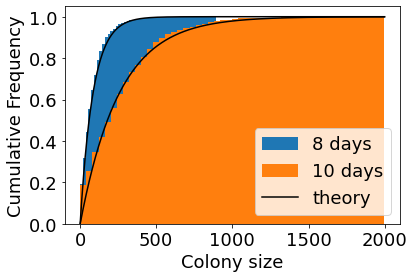

In [21]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
plt.hist(day8size, cumulative=True, density=True, bins=50,
        label="8 days")
plt.hist(day10size, cumulative=True, density=True, bins=50,
        label="10 days")
#plt.step(y8,idx8, label="8 days", color="yellow") # dati sperimentali 8gg
#plt.step(y10,idx10, label="10 days", color="red") # dati sperimentali 8gg
plt.plot(rho8cum, color="black", label="theory")
plt.plot(rho10cum, color="black")
plt.xlabel('Colony size')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.show()


Facciamo anche il grafico della pdf

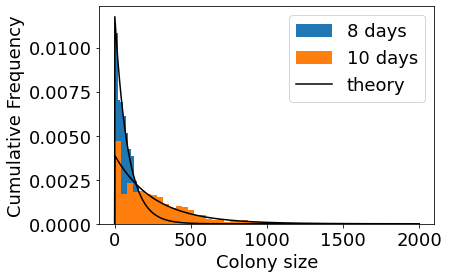

In [22]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
plt.hist(day8size, density=True, bins=50,
        label="8 days")
plt.hist(day10size, density=True, bins=50,
        label="10 days")
#plt.step(y8,idx8, label="8 days", color="yellow") # dati sperimentali 8gg
#plt.step(y10,idx10, label="10 days", color="red") # dati sperimentali 8gg
plt.plot(rho8, color="black", label="theory")
plt.plot(rho10, color="black")
plt.xlabel('Colony size')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.show()

### Esercizio: Birth and death process 

Ripetere il calcolo precedente nel caso di un modello che consideri anche il rate di morte $\beta$  per le cellule. In questo modello (noto come birth and death process), la probabilità di trovare al tempo $t$ una colonia di dimensione $S$ è data da 

$$P(S|t, \gamma)=\langle s(t) \rangle 
\left( \frac{\gamma-\beta}{\gamma\langle 
s(t) \rangle -\beta}\right)^2\left( 1- \frac{\gamma-\beta}{\gamma\langle 
s(t) \rangle -\beta}\right)^{S-1}$$



dove

$$\langle s(t) \rangle= e^{(\gamma-\beta)t}$$

Stimare $\gamma$ e $\beta$ e confrontare il risultato con i dati sperimentali facendo un grafico delle distribuzioni cumulate.

**Suggerimento:** per minimizzare una funzione a molti parametri potete usare scipy.optimize.fmin invece di scipy.optimize.brent
vedi:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html
        

**Svolgimento**

Per prima cosa riscrivo per esteso la distribuzione di probabilità
$$P(S|t, \gamma)=e^{(\gamma-\beta)t}
\left( \frac{\gamma-\beta}{\gamma e^{(\gamma-\beta)t} -\beta}\right)^2\left( 1- \frac{\gamma-\beta}{\gamma e^{(\gamma-\beta)t} -\beta}\right)^{S-1}$$

Non ho bisogno di ricaricare i dati perchè sono gli stessi che ho caricato prima, quello che devo fare è ridefinire la funzione con cui calcolo la densità di probabilità e poi implementare una ottimizzazione su più parametri.

Dato che per l'ottimizzazione è più semplice avere una funzione con un unuico argomento vettoriale piuttosto che una funzione con più variabili scalari ridefinisco la funzione in modo tale che prenda come argomento una unica variabile vettoriale che ha per componenti le variabili scalari.

In [23]:
# definiamo la p(S|t,gamma) per t=8 (rho8) e t=10 (rho10)
def rhos(Gamma2,Beta):
     
    e8=np.exp(Gamma2-Beta)*8.
    prima8 = ((Gamma2-Beta)/(Gamma2*e8 - Beta))**2
    seconda8 = np.zeros(N)
    rho8 = np.zeros(N)
    
    e10=np.exp(Gamma2-Beta)*10.
    prima10 = ((Gamma2-Beta)/(Gamma2*e10 - Beta))**2
    seconda10=np.zeros(N)
    rho10=np.zeros(N)
    
    for n in range(0,N):
        seconda8[n] = (1-prima8)**(n-1)
        rho8[n] = e8*prima8*seconda8
        seconda10[n] = (1-prima10)**(n-1)
        rho10[n] = e10*prima10*seconda10
    
    rho8[0]=0.
    rho10[0]=0.
    #questa condizione mi assicura che se parto da 0 cellelule non avverrà mai di trovare delle cellule all'interno di questa colonia
    
    return rho8,rho10

Devo ridefinire anche la funzione di verosimiglianza perchè devo renderla funzione di due variabili, non più solo di una, perchè la distribuzione di probabilità stessa è funzione di due variabili.

In [24]:
def likelihood(x):
    
    x[0] = Gamma2
    x[1] = Beta
    
    rho8,rho10=rhos(Gamma2,Beta)
    likelihood=0.
    
    for i in range(len(day8size)):
        likelihood+=-np.log(rho8[day8size[i]])
        
    for i in  range(len(day10size)):
        likelihood+=-np.log(rho10[day10size[i]])
        
    return likelihood

In [ ]:
#troviamo il massimo della Likelihood (calcoliamo il minimo di -L)
bestfit=scipy.optimize.brent(likelihood,brack=(0.4,Gamma2_initial,0.7))
#argomento di optimize.brent sono la funzione da ottimizzare e poi alcune informazioni aggiuntive come il range da
#eplorare, in questo caso in particolare va da 0.4 a 0.7 controllando anche il valore inizialmente assegnato a gamma



In [ ]:
Gamma2_best=bestfit
print(Gamma2_best,likelihood(Gamma2_best))
rho8,rho10=rhos(Gamma2_best) #qui definisco due parametri che sono i parametri con il valore migliore